## Trabalho T3 - Aproximação de Funções: Interolação e ajuste por mínimos quadrados

### MTM 224 - Mét. Numéricos Computacionais

**Nome dos integrantes do grupo:** Lucas Both Steinmetz Ribeiro e Murilo Hesse Block

### Questão 1
Considere os dados,
$$
\begin{array}{cccccc}
\hline
x    &1,6  &1,9  &2,5    &3,2   &3,9  &4,5 \\ \hline
f(x) &2,0  &8,0  &14,0   &15,5  &9,0  &2,1  \\
\hline
\end{array}
$$

(a) Calcule $f(2,9)$ usando polinômios interpoladores de Newton de segundo a quarto graus. Escolha a sequência de pontos que julgar mais adequada.
		 
(b) Utilize a expressão

$$ R_n \cong (x-x_0)(x-x_1)...(x-x_n)f[x_0, x_1,...,x_n, x]$$ 

para fazer uma estimativa do erro em cada uma das previsões.

		
(c) Para o polinômio que forneceu o melhor resultado, use a fórmula de Lagrange com os mesmos pontos e compare o resultado. Comente o que você observou.

a)

In [14]:
from re import X
from matplotlib.pylab import f
import numpy as np

Xg2 = np.array([1.9, 2.5, 3.2])
Fxg2 = np.array([8.0, 14.0, 15.5])

Xg3 = np.array([1.6, 1.9, 2.5, 3.2])
Fxg3 = np.array([2.0, 8.0, 14.0, 15.5])

Xg4 = np.array([1.6, 1.9, 2.5, 3.2,3.9])
Fxg4 = np.array([2.0, 8.0, 14.0, 15.5, 9.0]) 

def coeficientes_interpolacao(x, fx):
    n = len(x)
    coeficientes = fx.copy()

    for j in range(1, n):
        coeficientes[j:] = (coeficientes[j:] - coeficientes[j - 1]) / (x[j:] - x[j - 1])

    return coeficientes

def avaliar_interpolador(coeficientes, x, ponto):
    resultado = coeficientes[0]
    n = len(coeficientes) - 1

    for i in range(1, n + 1):
        termo = coeficientes[i]
        for j in range(i):
            termo *= (ponto - x[j])
        resultado += termo

    return resultado


for grau in range(2, 5):
    coeficientes = coeficientes_interpolacao(eval(f'Xg{grau}'), eval(f'Fxg{grau}'))
    resultado = avaliar_interpolador(coeficientes, eval(f'Xg{grau}'), 2.9)
    
    print(f'Grau {grau}: f(2.9) = {resultado}')

Grau 2: f(2.9) = 15.582417582417584
Grau 3: f(2.9) = 15.20238095238095
Grau 4: f(2.9) = 15.489056492162081


b)

In [15]:
def estimar_erro(x, x_interpolados, coeficientes):
    termo_produto = np.prod(x - x_interpolados)
    return termo_produto * coeficientes[-1]

for grau in range(2, 5):
    coeficientes = coeficientes_interpolacao(eval(f'Xg{grau}'), eval(f'Fxg{grau}'))
    resultado = avaliar_interpolador(coeficientes, eval(f'Xg{grau}'), 2.9)
    x_interpolados = eval(f'Xg{grau}[:{grau + 2}]')
    erro_estimado = estimar_erro(2.9, x_interpolados, coeficientes)
    
    print(f'Grau {grau}: f(2.9) = {resultado}, Estimativa de Erro = {erro_estimado}')

Grau 2: f(2.9) = 15.582417582417584, Estimativa de Erro = 0.7252747252747254
Grau 3: f(2.9) = 15.20238095238095, Estimativa de Erro = -0.4940476190476213
Grau 4: f(2.9) = 15.489056492162081, Estimativa de Erro = -0.2866755397811312


c)

In [16]:
def lagrange(X, Y, x):
    n = len(X)
    valor = 0.0
    for k in range(n):
        lk = 1.0
        for i in range(n):
            if k!= i:
                lk = lk*(x-X[i])/(X[k]-X[i])
        valor = valor + Y[k]*lk
    return (valor)

resultado_lagrange = lagrange(Xg4, Fxg4, 2.9)

print(f'Grau {grau}: Lagrange = {resultado_lagrange}')

Grau 4: Lagrange = 15.489056492162081


Os métodos apresentaram resultados semelhantes, indicando que, apesar de suas fundamentações distintas, a escolha entre eles pode depender mais de preferências pessoais ou fatores externos do que de diferenças significativas em termos de precisão.

### Questão 2
Os resultados da densidade da água $\rho$ para diferentes temperaturas são representados na tabela a seguir. 
$$
\begin{array}{cccccccc}
\hline
T(^\circ C)   &-10    &0      &10     &15     &20      &30      &60\\ \hline
\rho \, (g/cm^3)        &0,9981 &0,9998 &0,9997 &0,9991 &0,9982  &0,9957  &0,9832 \\
\hline
\end{array}
$$
Use interpolação para estimar $\rho(17,5)$  e para estimar a temperatura $T$ para que a densidade seja $0.9995$ g/cm$^3$. Justifique as escolhas do método e pontos utilizado. 



In [17]:
import matplotlib.pyplot as plt
import numpy as np

temperaturas = np.array([-10, 0, 10, 15, 20, 30, 60], dtype=float)
densidades = np.array([0.9981, 0.9998, 0.9997, 0.9991, 0.9982, 0.9957, 0.9832], dtype=float)

print('Estimação de p(17,5)', lagrange(temperaturas, densidades, 17.5))
print('Estimação de T para 0.9995 g/cm³', lagrange(densidades, temperaturas, 0.9995))


Estimação de p(17,5) 0.9986843004014757
Estimação de T para 0.9995 g/cm³ 12.068007533705739


Escolhemos usar a fórmula do método de Lagrange porque é fácil de usar. Decidimos usar apenas os pontos que já tínhamos na tabela, dentro do intervalo dado, para ter certeza de obter resultados mais precisos, visto que o método funciona melhor quando aplicado a valores que estão na faixa dos dados que já temos.

### QUESTÃO 3

Considere a função 
$$f(x)=\frac{3.17}{0.71 + 9.81x^2}$$

(a) Aproxime o valor de $f(1.78)$ usando um polinômio interpolador de grau 3 no intervalo [1, 2] e compare com o valor da função. Mostre o gráfico do polinômio e da função nesse intervalo. 

(b) Repita o item anterior, mas dessa vez utilize um polinômio de grau 10 no intervalo [-2,2] e comente o que você observou. 
	
(c)Pesquise e responda o que é "Fenômeno de Runge".

a)

[0.3013308  0.13914189 0.07934919]
Resultado função:  0.09304276029746153
Resultado real:  0.09971060647828302


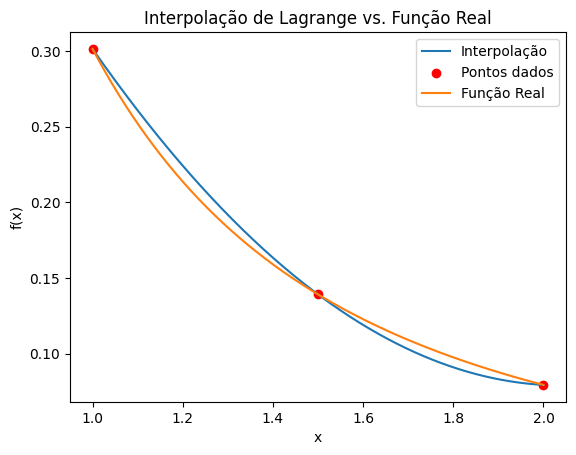

In [18]:
def f(x):
    return 3.17 / (0.71 + 9.81 * x**2)

X = np.array([1, 1.5, 2])  
Y = np.array([f(1), f(1.5), f(2)])
print(Y)
x = lagrange(X, Y, 1.78)

print("Resultado função: ", x)
print("Resultado real: ", f(1.78))

x_values = np.linspace(1, 2, 1000)
y_values_interp = [lagrange(X, Y, xi) for xi in x_values]
y_values_real = [f(xi) for xi in x_values]

plt.plot(x_values, y_values_interp, label='Interpolação')
plt.scatter(X, Y, color='red', label='Pontos dados')
plt.plot(x_values, y_values_real, label='Função Real')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolação de Lagrange vs. Função Real')
plt.legend()
plt.show()

b)

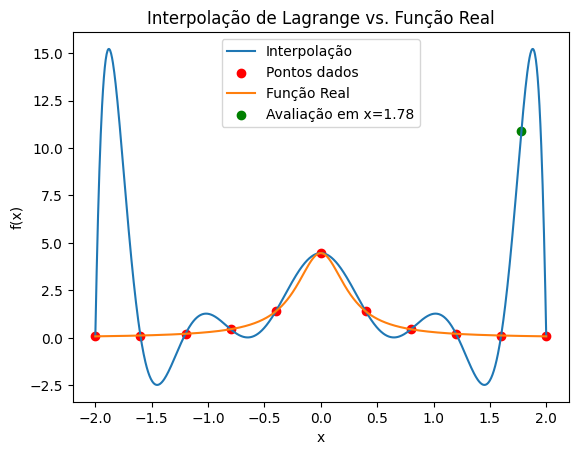

Resultado função:  10.91823071465753
Resultado real:  0.09971060647828302


In [19]:
X = np.linspace(-2, 2, 11)
Y = np.array([f(xi) for xi in X])

x_values = np.linspace(-2, 2, 1000)
y_values_interp = [lagrange(X, Y, xi) for xi in x_values]
y_values_real = [f(xi) for xi in x_values]

x_interpolated_178 = lagrange(X, Y, 1.78)

plt.plot(x_values, y_values_interp, label='Interpolação')
plt.scatter(X, Y, color='red', label='Pontos dados')
plt.plot(x_values, y_values_real, label='Função Real')
plt.scatter(1.78, x_interpolated_178, color='green', label='Avaliação em x=1.78')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Interpolação de Lagrange vs. Função Real')
plt.legend()
plt.show()

print("Resultado função: ", x_interpolated_178)
print("Resultado real: ", f(1.78))

Um polinômio de grau 10 apresenta um maior risco de sobreajuste, indicando que ele pode se ajustar de forma extremamente precisa aos pontos de dados de treinamento, mas essa precisão pode não se estender de maneira fiel à função real em outras regiões. Portanto, o polinômio de grau 10 pode ser mais vulnerável a capturar ruídos nos dados, resultando em uma representação menos precisa da função global.

c)
O fenômeno de Runge é um problema de oscilação nas bordas de um intervalo, que ocorre quando se usa interpolação polinomial com polinómios de ordem elevada.

### QUESTÃO 4
Dados os seguintes pontos tabelados 
$$
\begin{array}{cccccccccc}
\hline
x_i    &0.01  &0.99  &2.02  &3.01  &3.97  &5.01  &5.93  &6.99  &8.08  \\
\hline
f(x_i) &0.000 &1.621  &1.782  &0.915 &-0.122 &-0.225 &1.099 &2.728 &3.534\\
\hline
\end{array}
$$

(a) Encontre o polinômio de grau 3 que melhor se ajusta aos pontos dados

(b) Encontre a função do tipo $g(x)=a_1x + a_2 sen(x)$ que melhor se ajusta 

(c) Decida qual das duas funções acima é a melhor escola para estimar $f(11.5)$. Jusfifique sua resosta.


a)

f(11.5) =  23.368906305400017


Text(0.5, 1.0, 'Ajuste de Mínimos Quadrados - Polinômio Cúbico')

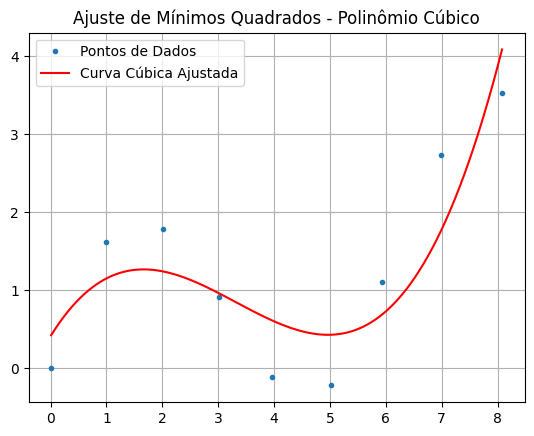

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import solve

X = np.array([0.01, 0.99, 2.02, 3.01, 3.97, 5.01, 5.93, 6.99, 8.08])
Y = np.array([0.000, 1.621, 1.782, 0.915, -0.122, -0.225, 1.099, 2.728, 3.534])

A11 = np.sum(X**6)
A12 = np.sum(X**5)
A13 = np.sum(X**4)
A14 = np.sum(X**3)
A23 = np.sum(X**2)
A24 = np.sum(X)
A34 = len(X)
B1 = np.sum(X**3 * Y) 
B2 = np.sum(X**2 * Y)
B3 = np.sum(X * Y)
B4 = np.sum(Y)


A = np.array([[A11, A12, A13, A14], [A12, A13, A14, A23], [A13, A14, A23, A24], [A14, A23, A24, A34]])
B = np.array([B1, B2, B3, B4])
a = solve(A, B)

gA = lambda x: a[0] * x**3 + a[1] * x**2 + a[2] * x + a[3]
print("f(11.5) = ", gA(11.5))

Xr = np.arange(X[0], X[-1] + 0.01, 0.01)
Yr = [gA(x) for x in Xr]


plt.plot(X, Y, ".", label='Pontos de Dados')
plt.plot(Xr, Yr, "-", label='Curva Cúbica Ajustada', color='red')
plt.legend()
plt.grid()
plt.title('Ajuste de Mínimos Quadrados - Polinômio Cúbico')

b)


g(11.5) =  1.5945955770090403


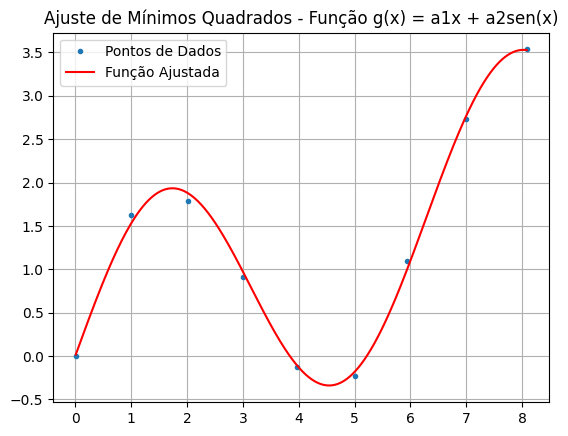

In [21]:
A11 = np.sum(X**2)
A12 = np.sum(np.sin(X)*X)
A21 = A12
A22 = np.sum(np.sin(X)**2)
B1 = np.sum(X*Y) 
B2 = np.sum(np.sin(X)*Y)

A = np.array([[A11, A12], [A21, A22]])
B = np.array([B1, B2])
a = solve(A, B)

gB = lambda x: a[0] * x + a[1] * np.sin(x)
print("g(11.5) = ", gB(11.5))
Xr = np.arange(X[0], X[-1] + 0.01, 0.01)
Yr = [gB(x) for x in Xr]

plt.plot(X, Y, ".", label='Pontos de Dados')
plt.plot(Xr, Yr, "-", label='Função Ajustada', color='red')
plt.legend()
plt.grid()
plt.title('Ajuste de Mínimos Quadrados - Função g(x) = a1x + a2sen(x)')
plt.show()

c)

A função da letra B é a melhor escolha para estimar f(11.5). 
Observando o gráfico das duas aproximações, nota-se que a função g(x) = a1x + a2sen(x) possui um erro muito menor em comparação ao polinômio de grau 3. Além disso, no ponto f(11.5), o resultado da função com menor erro possui um resultado muito mais condizente com os pontos.

### QUESTÃO 5
 Linearize o modelo matemático
$$ y = \alpha x e^{\beta x}$$ 
e encontre os parâmetros $\alpha$ e $\beta$ que fornecem o melhor ajute com base nos seguintes dados.  
$$
\begin{array}{cccccccccc}
\hline
x    &0,1 &0,2 &0,4 &0,6  &0,9 &1,1 &1,5 &1,7 &1,8\\
\hline
y    &0,75 &1,25 &1,45 &1,25 &0,85 &0,55 &0,35 &0,19 &0,18\\
\hline
\end{array}
$$

In [22]:
import numpy as np
from scipy.optimize import curve_fit

x_dados = np.array([0.1, 0.2, 0.4, 0.6, 0.9, 1.1, 1.5, 1.7, 1.8])
y_dados = np.array([0.75, 1.25, 1.45, 1.25, 0.85, 0.55, 0.35, 0.19, 0.18])

def modelo(x, A, B):
    return A + np.log(x) + B * x

parametros, covariancia = curve_fit(modelo, x_dados, np.log(y_dados))

A, B = parametros

alfa = np.exp(A)
beta = B

print("Parâmetros encontrados:")
print(f"Alfa: {alfa}")
print(f"Beta: {beta}")


ModuleNotFoundError: No module named 'scipy'